# Física del Attosegundo

## Ejercicios Computacionales

Darío Mitnik

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# 1) Forward Derivative

Discretizamos una función $f_i = f(x_i)$ y la escribimos como un vector $\vec{f}$:

\begin{eqnarray}
\vec{f} = \left(
\begin{matrix}
f_0 \\
f_1 \\
f_2 \\
f_3 \\
f_4 \\
f_5 
\end{matrix}
\right)
\nonumber
\end{eqnarray}

La aproximación de "diferencia central" para la derivada se define como:

\begin{eqnarray}
f'_i = \frac{f_{i+1} - f_{i-1} }{2\, \Delta x}
\nonumber
\end{eqnarray}


Definiendo la matriz $D$: 
\begin{eqnarray}
\mathbf{D} = \frac{1}{2 \, \Delta x} \, \, 
\left( 
\begin{matrix} 
0 & 1 & 0 & 0 & 0 & 0 \\ 
-1 & 0 & 1 & 0 & 0 & 0 \\ 
0 & -1 & 0 & 1 & 0 & 0 \\ 
0 & 0 & -1 & 0 & 1 & 0 \\ 
0 & 0 & 0 & -1 & 0 & 1 \\ 
0 & 0 & 0 & 0 & -1 & 0 
\end{matrix} 
\right)  
\nonumber
\end{eqnarray}
 
Podemos escribir la operación de derivación como el 
producto de la matriz $D$ por el vector $f$

\begin{eqnarray}
\vec{f}' = \mathbf{D} \, \vec{f} 
\nonumber
\end{eqnarray}



In [2]:
# Función que deriva una función y(x) (central difference)

def centralderiv(y,x):
    
    # grid (se asume uniforme)
    h = x[1]-x[0] 
    n = len(x)-1
    
    # Matriz D 
    ones = np.ones(n) # vector (1,1,....1)
    D = np.diag(ones,1) + np.diag(-ones,-1)
    
    # Multiplicación D.y
    Deriv = np.dot(D,y) / (2 * h)
    
    return Deriv

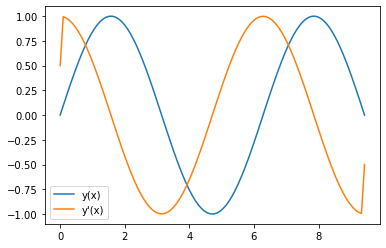

In [3]:
# Ejemplo de cómo utilizar la función centralderiv

# array definitions (0,3 Pi)  
nsize = 100
xmin=0
xmax=3*np.pi
x = np.linspace(xmin,xmax,nsize)

# derivative of Sin(x)
y = np.sin(x)
yp = centralderiv(y,x)

# Plot
plt.plot(x,y,label='y(x)');
plt.plot(x,yp,label="y'(x)");
plt.legend();

# check results
ydif = yp - np.cos(x)

### Ejercicio 1: Derivadas

- Resolver los problemas que hay en los bordes
- Graficar los errores en función del tamaño del grid (*nsize*)
- Repetir reemplazando la derivada *central difference* por *backward* y *forward*.
- Escribir una función que calcule la derivada segunda y comprobar los resultados.

# 2) Integrales

Para calcular el área bajo la curva $y(x)$ podemos 
hacer una aproximación de rectángulos:

\begin{eqnarray}
\int_a^b f(x) \, dx \approx \sum_{i=1}^N   f_i \, \Delta x 
\nonumber
\end{eqnarray}

También podemos hacer una aproximación de trapecios:
\begin{eqnarray}
\int_a^b f(x) \, dx & \approx & \sum_{i=0}^{N-1} 
\frac{f_{i+1} + f_{i}}{2} \, \Delta x = \nonumber \\
&=& \frac{1}{2} f_0 + \sum_{i=1}^{N-1} f_i + \frac{1}{2} f_N
\nonumber
\end{eqnarray}

In [4]:
# Función que integra una función y(x) 
def integraterect(y,x):
    
    # grid (se asume uniforme)
    h = x[1]-x[0] 
    n = len(x) 
    
    # Integral
    S = np.sum(y) * h
        
    return S

In [5]:
# Test: Integral de Sin(x) enter 0 y 3 Pi:

yint = integraterect(y,x)
print(yint)


1.9984892721876022


### Ejercicio 2: Integrales

- Graficar los errores en función del tamaño del grid (*nsize*)
- Repetir reemplazando la integral por rectángulos por la integral por trapecios.

# 3) Hamiltoniano

\begin{eqnarray}
\hat{H} \, \varphi(x) &=& -\frac{1}{2} \frac{d^2 \, \varphi(x)}{dx} + 
V(x) \, \varphi(x) \nonumber
\end{eqnarray}

\begin{eqnarray}
\mathbf{H} =
\left( 
\begin{matrix} 
\frac{1}{(\Delta x)^2} + V_0 & -\frac{1}{2(\Delta x)^2} & 0 & 0 & \ldots \\ 
-\frac{1}{2(\Delta x)^2} & \frac{1}{(\Delta x)^2} + 
V_1 & -\frac{1}{2(\Delta x)^2} & 0 & \ldots \\ 
0 & -\frac{1}{2(\Delta x)^2} & \frac{1}{(\Delta x)^2} + V_2 & -\frac{1}{2(\Delta x)^2} & \ldots \\ 
\ldots & \ldots & \ldots & \ldots & \ldots  \\ 
\ldots & \ldots & \ldots & \ldots & \ldots  \\ 
0 & 0 & 0  & -\frac{1}{2(\Delta x)^2} & \frac{1}{(\Delta x)^2} + V_N
\end{matrix} 
\right)  
\nonumber
\end{eqnarray}


\begin{eqnarray}
\mathbf{H} \, \vec{f} = E \, \vec{f} 
\nonumber
\end{eqnarray}


## Ejercicio 3: Hamiltoniano

- Escribir una función que calcule el Hamiltoniano de un oscilador armónico unidimensional


# 4) Solución del Hamiltoniano: Autofunciones y Energías

In [ ]:
# Una vez que se construye el Hamiltoniano (Matriz H)
# se lo diagonaliza de la siguiente manera:

from numpy.linalg import eigh


# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

## Ejercicio 4: Estados estacionarios del pozo finito ("*Jellium*")

- Comprobar que obtiene las soluciones correctas para un Oscilador Harmónico.
- Si la función eigh no normaliza los vectores, normalizarlos.
- Reemplazar el potencial $V(x)$ por un Jellium que contenga 2 estados ligados.
- Diagonalizar y verificar que las autofunciones y energías obtenidas son correctas.
